In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pylab as p  
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\gaura\OneDrive\Desktop\Insight_DE\Data_Incubator\temp_datalab_records_linkedin_company\temp_datalab_records_linkedin_company.csv')
df.head()

C:\Users\gaura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,dataset_id,followers_count,employees_on_platform,entity_id,cusip,isin
count,2.426196e+06,2.426196e+06,2.426196e+06,0.0,0.0,0.0
mean,7.347932e+05,7.167738e+04,7.587255e+03,NaN,NaN,NaN
std,5.004440e+05,2.638344e+05,2.412444e+04,NaN,NaN,NaN
min,5.832900e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,6.851400e+04,2.148000e+03,2.180000e+02,NaN,NaN,NaN
50%,8.790880e+05,9.335000e+03,1.083000e+03,NaN,NaN,NaN
75%,9.029690e+05,3.864200e+04,4.513000e+03,NaN,NaN,NaN
max,2.339486e+06,7.833967e+06,5.779520e+05,NaN,NaN,NaN


#### From the above info we get from the dataset, we can conclude some of the points:-

There is no need of the last 4 columns since almost all of them are NaN hence we can drop them.

There is a  significant difference in the mean of the followers_count and employees_on_platform which clearly signifies that the companies are not hiring as much as they are making offers. There could be many reasons for that. It could be the canditate skills, etc., but since no info like that is given in this data hence we are assuming that all the followers are the potential candidates. We will going to use this info to get an idea of the expansion rate of the company.

Also we can see that the difference bewteen the 75% and the max is very sigifiacnt which raises an alarm for the check of skewness all entire data and year_wise dataset to if the data is skewed, which year data is actually behind it.


# DATA PREPROCESSING

### Lets drop the columns which we are not going to use and are un-necessary and  cahnge the data to year since we are going to study all the data based on the years and sessions(duarion of one year approximate)

In [4]:
df = df.drop(['date_added', 'date_updated', 'description', 'website', 'entity_id', 'cusip', 'isin'], axis = 1)

# splitting date into years

date = df.iloc[:, 1].values
year_date = [d.split('-') for d in date]
df[['year', 'month', 'date']] = pd.DataFrame(year_date)
df = df.assign(as_of_date = df['year'])
df = df.rename(columns={'as_of_date': 'as_of_year'})
df = df.drop(['month', 'date', 'year'], axis = 1)

df.head()

,dataset_id,as_of_year,company_name,followers_count,employees_on_platform,link,industry
0,58329,2015,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking
1,58329,2015,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking
2,58363,2015,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace
3,58366,2015,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals
4,58371,2015,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail


In [5]:
print(df.iloc[:,3:5].skew(axis = 0, skipna = True))
print(df.iloc[:,3:5].kurt(axis = 0, skipna = True))

followers_count          10.07053
employees_on_platform     8.42303
dtype: float64
followers_count          145.027108
employees_on_platform    107.883346
dtype: float64


From here we can say that the entire data is highly poistive skewed. Hence we can say that the later years are making more impact on the entire dataset.

#### Lets check if their is any miising value, and if there is, then in which columns it is and how it will going to affect us and how to deal with it.

In [6]:
if df.isnull().values.any():
    col = df.columns[df.isna().any()].tolist()
    print('column with NaN: {}'.format(col))
    indices = list(np.where(df[col].isna()))
    print(indices)
    print('Total no. of the NaN: {}'.format(len(indices[0])))

column with NaN: ['industry']
[array([   9060,    9063,    9064, ..., 1997000, 1997180, 1997205],
      dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]
Total no. of the NaN: 36265


From above cell we get to know that 'industry' column has 36265 of the NaN which if we compare with the entire dataset is not too much. But still if see through the data we will find that at some industry of the already listed company with thier respective industry is not given. Hence, it will not be a big problem since most of the comapnies and industries are repetetive and we can find the misiing industry from thier. 

### Spliting the dataset into two different dataset, first having details about ID, company name, linkedIn, industry and the second having the details about ID, follower_count and  Emp_count

In [7]:
df_detail = df.iloc[:,[0, 1, 2, -2, -1]]
df_num = df.iloc[:,[0, 3,4]]
df_detail.head()
print(df_num.head())

   dataset_id  followers_count  employees_on_platform
0       58329           552254                  38124
1       58329           552862                  38141
2       58363            59157                  14982
3       58366           336175                  26448
4       58371           134255                  62574


## Lets start Dataset Generation. We have to come up new dataset having the Follower_count and Emp_count of all the years along with thier respective ID, seperated into different years

We are going to use MySql and Python together to come up a DataSet Table.

In [8]:
# spliting the dataset df_num based on years

df_15 = df_num.loc[df.as_of_year == '2015']
df_16 = df_num.loc[df.as_of_year == '2016']
df_17 = df_num.loc[df.as_of_year == '2017']
df_18 = df_num.loc[df.as_of_year == '2018']

# get the list of all the Company IDs into seperated list to make unique set out of them 

id_list_15 = set(np.array(df_15.iloc[:,0].values))

id_list_16 = set(np.array(df_16.iloc[:,0].values))

id_list_17 = set(np.array(df_17.iloc[:,0].values))

id_list_18 = set(np.array(df_18.iloc[:,0].values))

arr = [id_list_15, id_list_16, id_list_17, id_list_18]

# making unique set of IDs

ID = []

for i in arr:
    for j in i:
        if j not in ID:
            ID.append(j)

# initializing and updating dictionaries with {Comp_ID : Sum of (Follower_count or Emp_count)}

Fol_15 = {}
Emp_15 = {}
Fol_16 = {}
Emp_16 = {}
Fol_17 = {}
Emp_17 = {}
Fol_18 = {}
Emp_18 = {}



for i in arr:
    for j in i:
        if i == id_list_15:
            temp = df_15.loc[df['dataset_id'] == j].values
            Fol_15.update({j : temp[:,1].sum()})
            Emp_15.update({j : temp[:,2].sum()})
            
        elif i == id_list_16:
            temp = df_16.loc[df['dataset_id'] == j].values
            Fol_16.update({j : temp[:,1].sum()})
            Emp_16.update({j : temp[:,2].sum()})
        
        elif i == id_list_17:
            temp = df_17.loc[df['dataset_id'] == j].values
            Fol_17.update({j : temp[:,1].sum()})
            Emp_17.update({j : temp[:,2].sum()})
        
        elif i == id_list_18:
            temp = df_18.loc[df['dataset_id'] == j].values
            Fol_18.update({j : temp[:,1].sum()})
            Emp_18.update({j : temp[:,2].sum()})

#### Make a table and insert values in it

In [9]:
import sqlite3

# making connection
conn = sqlite3.connect(':memory:')

#initializing cursor
cursor = conn.cursor()

# creating table in SQL
cursor.execute("""CREATE TABLE DataSet (
        ID INT NOT NULL,
        FOL_15 INT, EMP_15, 
        FOL_16, EMP_16,
        FOL_17, EMP_17,
        FOL_18, EMP_18)""")

# initializing variables and Inserting values in the Table to make final DataFrame 
for i in ID:
    
    if i in Fol_15.keys():
        F15 = Fol_15[i]
        E15 = Emp_15[i]
        t15 = [i, F15, E15]
    else:
        F15, E15 = 0, 0
    #print(t15)
    
    if i in Fol_16.keys():
        F16 = Fol_16[i]
        E16 = Emp_16[i]
        t16 = [i, F16, E16]
    else:
        F16, E16 = 0, 0
    #print(t16)
    
        
    if i in Fol_17.keys():
        F17 = Fol_17[i]
        E17 = Emp_17[i]
        t17 = [i, F17, E17]
    else:
        F17, E17 = 0, 0
    #print(t17)
    

    if i in Fol_18.keys():
        F18 = Fol_18[i]
        E18 = Emp_18[i]
        t18 = [i, F18, E18]
    else:
        F18, E18 = 0, 0
    #print(t18)
    
    t = [i, F15, E15, F16, E16, F17, E17, F18, E18]
    
    statement = "INSERT INTO DataSet VALUES (%d,%d,%d,%d,%d,%d,%d,%d,%d);"%(int(i), int(F15), int(E15), int(F16), int(E16), int(F17), int(E17), int(F18), int(E18))
    
    cursor.execute(statement)

cursor.execute("SELECT * FROM DataSet")
#print(cursor.fetchall())

# the DataSet 
DataSet = pd.read_sql_query("SELECT * from DataSet", conn)

conn.commit()

# closing the connection
conn.close()

DataSet.head()

,ID,FOL_15,EMP_15,FOL_16,EMP_16,FOL_17,EMP_17,FOL_18,EMP_18
0,59430,4821059,969915,22349137,4145644,28800773,5305335,19755621,3245357
1,59461,155592,28485,723730,132369,842212,141417,529358,76440
2,59462,15016503,2350108,71759151,10224482,86843456,12176168,55039831,7664544
3,59470,1356433,164480,6248525,735211,7332429,893062,4524409,568097
4,59472,1354306,336036,6129102,1380991,6707986,1567612,3832611,902776


#### Now we will add three colmns to summarise all of the dataset. Instead of taking them as data from individual year, we will consider session i.e.  session 2015-2016, session 2016-2017, and session 2017-2018. 

###### A session can be defined as:  Session 2015_2016 = (EMP_16 - EMP_15) / FOL_15

From sessios, we can get info about the increament/decreament in the number of employers_on_platform and how of the followers from the last year has been added in this list, In short it will gives an idea about the Hiring rate of the company. We are assuming that a company hires people in one seesion from the previous session. Since this is the general format of the comapnies out there. If one applies in a company in 2020 summer then the entire hirirng process takes time of about 3-6 months(varies as per the company). Hence it will be saisd that the person is hired in 2020-2021 session. 

Also increment in the Follower_count per year(FOL_{}) will give us an idea about the popularity and better image of the comapny in the market which can give a glimpse of its performance at the stock market too, though their are tons of other reasons too that affect the performance of a comapny in the stock market, but popularity is also an important aspect since it is directly proportional to that of the advertising, branding, and presenting Image. Similarly, increament in the Employer_count per year(EMP_{}) will give us an idea about the exapansion rate of the company. 

Session_{} will gove us an idea about the rate at which a partici=ular comapny hire or fire the employees. This will also tell us how much out of follower(proportional to that of the advertising on linkedIn), the comapny is actually hiring.

In [10]:
FF_15, FF_16, FF_17, FF_18 = DataSet.iloc[:,1].values, DataSet.iloc[:, 3].values, DataSet.iloc[:,5].values, DataSet.iloc[:,7].values
EE_15, EE_16, EE_17, EE_18 = DataSet.iloc[:,2].values, DataSet.iloc[:, 4].values, DataSet.iloc[:,6].values, DataSet.iloc[:,8].values

delta_EF_1516 = []
delta_EF_1617 = []
delta_EF_1718 = []

for i in range(1, len(FF_15)):

    DELTA_1516 = (((EE_16[i] - EE_15[i])/FF_15[i-1]) if FF_15[i-1] != 0 else 0)
    DELTA_1617 = (((EE_17[i] - EE_16[i])/FF_16[i-1]) if FF_16[i-1] != 0 else 0)
    DELTA_1718 = (((EE_18[i] - EE_17[i])/FF_17[i-1]) if FF_17[i-1] != 0 else 0)
    
    delta_EF_1516.append(DELTA_1516)
    delta_EF_1617.append(DELTA_1617)
    delta_EF_1718.append(DELTA_1718)

In [11]:
#DataSet.drop(['SESSION_1516', 'SESSION_1617', 'SESSION_1718'], axis = 1, inplace = True)
DataSet = pd.concat([DataSet, pd.DataFrame(delta_EF_1516), pd.DataFrame(delta_EF_1617), pd.DataFrame(delta_EF_1718)], axis = 1) 
DataSet.columns = ['ID', 'FOL_15', 'EMP_15', 'FOL_16', 'EMP_16','FOL_17', 'EMP_17', 'FOL_18', 'EMP_18', 'SESSION_1516', 'SESSION_1617', 'SESSION_1718']

DataSet.head()

,ID,FOL_15,EMP_15,FOL_16,EMP_16,FOL_17,EMP_17,FOL_18,EMP_18,SESSION_1516,SESSION_1617,SESSION_1718
0,59430,4821059,969915,22349137,4145644,28800773,5305335,19755621,3245357,0.021548,0.000405,-0.002256
1,59461,155592,28485,723730,132369,842212,141417,529358,76440,50.609119,2.696705,-5.356875
2,59462,15016503,2350108,71759151,10224482,86843456,12176168,55039831,7664544,0.038007,0.002200,-0.003742
3,59470,1356433,164480,6248525,735211,7332429,893062,4524409,568097,0.770370,0.029866,-0.090671
4,59472,1354306,336036,6129102,1380991,6707986,1567612,3832611,902776,0.323542,0.024497,-0.035634


### The final step - Scaling the dataset

In [12]:
from sklearn.preprocessing import StandardScaler
copy_dataset = DataSet.copy()
DataSet.iloc[:,1:] = StandardScaler().fit_transform(DataSet.iloc[:,1:])


C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Now its time to ANSWER the QUESTIONS we can get from this DataSet

## Which year has maximum Follower_count, Employer_on_platform Count?
## Also what are trends of four years and what is the acceptance Rate i.e. Session(decribed previously)?

Here we have a plot showing mean values of the Follower_count and Employer_on_platform count per year respectively, and we can see from here the significant difference in the numbers respectvely. On an avg., the Emp_count is about 20% percent of that of the Follower_count every year except 2017, when there is a rise in Emp_count and a significant spike in follower_count. This tells us that in 2017 the market was in good conitions and the comapnies are open to hiring hence throwing out more advertisement on linkedIn compared to preious years which clearly results in this suddden spike of follower_count 2017. But in 2018 Market again went down so the follower_count and Emp_count.

The above statement can be summarize using the second plot showing the different session acceptance rate, as stated, in 2017 the Emp_count increases and more of the applicants from 2016 got the job that can be seen from the plot while in case of session 1718 employment reduces and Followes numbers of year 2017 increases which results into decreament of the rate of acceptance. 

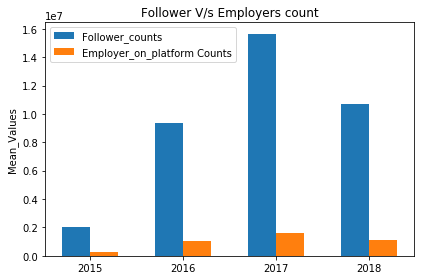

In [13]:
years =['2015', '2016', '2017', '2018']
fol_means = copy_dataset.iloc[:,[1, 3, 5, 7]].mean()
emp_means = copy_dataset.iloc[:,[2, 4, 6, 8]].mean()

x = np.arange(len(years))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
ax1 = ax.bar(x - width/2, fol_means, width, label='Follower_counts')
ax2 = ax.bar(x + width/2, emp_means, width, label='Employer_on_platform Counts')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean_Values')
ax.set_title('Follower V/s Employers count')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()


def autolabel(ax):
    for rect in ax:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



fig.tight_layout()

plt.show()

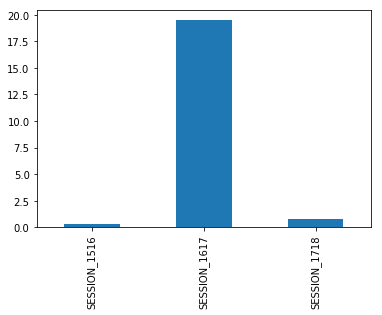

In [14]:
copy_dataset.iloc[:,-3:].mean().plot(kind = 'bar')


In [15]:
fol_mean = copy_dataset.iloc[:,[1, 3, 5, 7]].mean(axis = 1).nlargest(20)    # top 20 out of 4610 unique comapnies
emp_mean = copy_dataset.iloc[:,[2, 4, 6, 8]].mean(axis = 1).nlargest(20)    
ssn_mean = copy_dataset.iloc[:, [-3, -2, -1]].mean(axis = 1).nlargest(20)


## The top 20 companies with highest Follower_count, Employer_on_platform Count and Session acceptance rate and idea about their performance in Stock Market

#### Increasing Follower_count shows the popularity of that specific in the market which lures more candidates. It also goves us an idea about the vancancies as it is directly proportional to that of the Advertisement  of the Jobs on LinkedIn.
#### Incresing Employer_on_platform gives us an idea of the Expansion of the company, since there is always need of employees  in a growing company. 
#### Session Values give us an idea of teh growth and popularity of the comapny in that particular session. Though these figures highly depends on the market condition. 

All of the above parameters can combinely gives us an idea of the company's Stock Market Values, like an expanding comapny with high popularity gain momentum in the stock market, companies with high popularity are mostly big established comapnies hence as compared to their popularity(Follower_counts) the employers_on_platform will obviously be less. Companies like also perform good in stock market and considered as safe investment. While a comapny with less popularity and less employers_on_platform are either new startups or comapnies going through problamatic phase. In both of the case, things need to be taken into an account because no body knows when these companies will pick up there speed. Studying these comapnies can help the investor to find some good otential investment opportunities. 

In [16]:
row = fol_mean.index.tolist() 
pf=[]
pf1=[]
for i in row:
    pf.append(fol_mean[i])
    #p.append(int(copy_dataset.iloc[i,:].values[0]))
    pf1.append(df_detail.loc[df.dataset_id == int(copy_dataset.iloc[i,:].values[0])].values[0][2])
pd_fol = pd.concat([pd.DataFrame(pf1), pd.DataFrame(pf)], axis = 1)
pd_fol.columns = ['company', 'mean']
pd_fol.set_index('company')


,mean
company,
Google,1.273229e+09
Microsoft,9.390788e+08
Apple,8.713696e+08
IBM,8.511444e+08
Accenture,6.770039e+08
Amazon,6.193336e+08
Hewlett-Packard,6.124927e+08
Unilever,6.036320e+08
LinkedIn,5.399775e+08


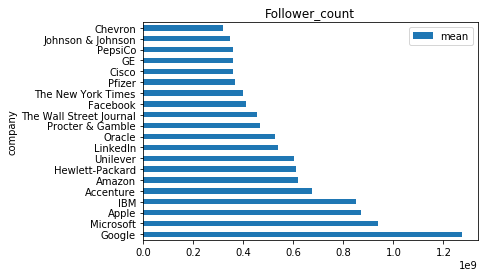

In [17]:
pd_fol.plot.barh(x = 'company', y='mean', title= 'Follower_count')


In [18]:
row = emp_mean.index.tolist() 
pe=[]
pe1=[]
for i in row:
    pe.append(emp_mean[i])
    #p.append(int(copy_dataset.iloc[i,:].values[0]))
    pe1.append(df_detail.loc[df.dataset_id == int(copy_dataset.iloc[i,:].values[0])].values[0][2])
pd_emp = pd.concat([pd.DataFrame(pe1), pd.DataFrame(pe)], axis = 1)
pd_emp.columns = ['company', 'mean']
pd_emp.set_index('company')


,mean
company,
IBM,1.213459e+08
Accenture,7.932717e+07
Walmart,7.018160e+07
Hewlett-Packard,6.374890e+07
Bank of America,5.223141e+07
AT&T,5.096982e+07
Wells Fargo,5.090237e+07
Cognizant,5.017944e+07
JPMorgan Chase & Co.,4.930949e+07


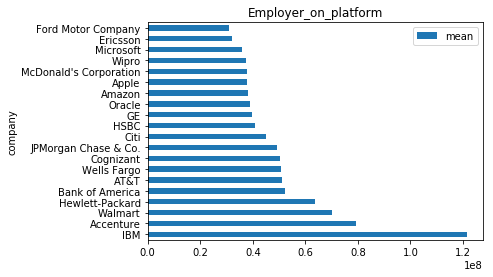

In [19]:
pd_emp.plot.barh(x = 'company', y='mean', title='Employer_on_platform')

In [20]:
row = ssn_mean.index.tolist() 
ps=[]
ps1=[]
for i in row:
    ps.append(ssn_mean[i])
    #p.append(int(copy_dataset.iloc[i,:].values[0]))
    ps1.append(df_detail.loc[df.dataset_id == int(copy_dataset.iloc[i,:].values[0])].values[0][2])
pd_ssn = pd.concat([pd.DataFrame(ps1), pd.DataFrame(ps)], axis = 1)
pd_ssn.columns = ['company', 'mean']
pd_ssn.set_index('company')


,mean
company,
Elliott Wilson Insurance,3538.162037
"Investment Property Exchange Services, Inc (IPX1031)",3021.218234
Optometrics Corporation,2175.211492
Evoke Pharma,1705.899602
Cme Enterprises Ltd,1302.243961
American Natural Resources Company (Tx),819.329710
The New Home Company Inc.,758.764590
FCBank,737.023197
"Electro-Sensors, Inc.",659.644495


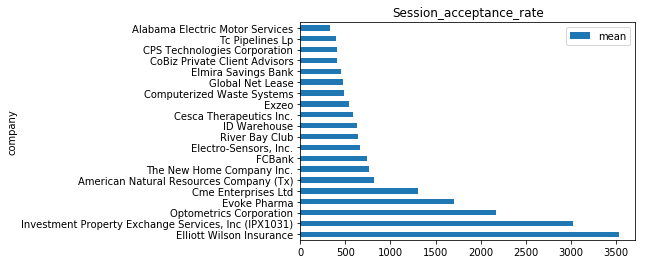

In [21]:
pd_ssn.plot.barh(x = 'company', y='mean', title='Session_acceptance_rate')

# Lets do the clustering now to see how many clusters we can form and what information those clusters will posses.

I found this while trying various clustering algorithm, that Heirarchical clustering(Dendrogram) was only giving two clusters one for positively scaled dataset and another for negatively scaled dataset while using KMeans and WCSS we got clusters with more variations which provides more detailed info about the dataset. In case of MeanShift Clustering, we got number of repetative clusters. Hence, at last we chose KMeans to study our dataset. 

In [22]:
copy_df = DataSet.copy()
copy_df=copy_df.fillna(0) 

## We are going cluster our DataSet based on different features to understand each scenario in a better way. 
Cluster_1 => based on Follower_count and Emp_count of the companies

Cluster_2 => based on Session_counts of the companies


### Cluster_1 => based on Follower_count and Emp_count of the companies


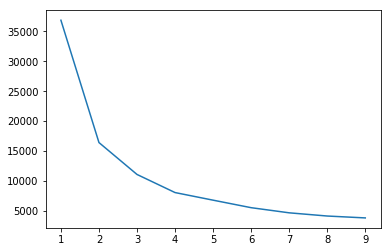

In [23]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(copy_df.iloc[:,1:-3])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)


Here we can see the Number of Clusters = 4

In [24]:
clf_1 = KMeans(n_clusters = 4, random_state = 0)
y_1 = clf_1.fit_predict(copy_df.iloc[:,1:-3])

#### Lets Visulaize the differnt clusters

<Figure size 1600x1200 with 0 Axes>

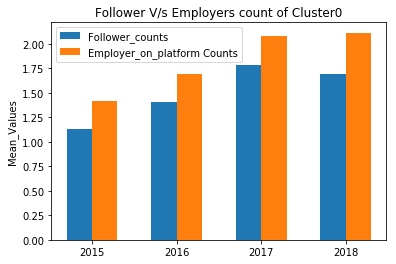

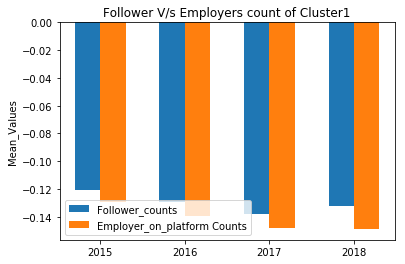

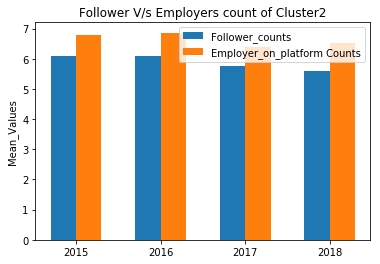

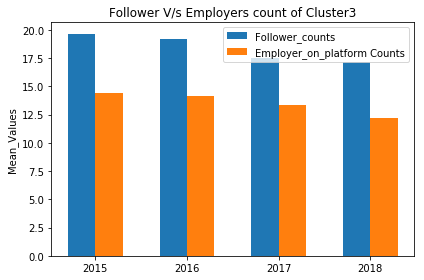

In [25]:
fig=plt.figure(figsize=(20, 15), dpi= 80, facecolor='w', edgecolor='k')   
color = ['b', 'r', 'y', 'g', 'm']
for i in range(4):
    
    years =['2015', '2016', '2017', '2018']
    fol_means = copy_df[y_1==i].iloc[:,[1,3,5,7]].mean()
    emp_means = copy_df[y_1==i].iloc[:,[2, 4, 6, 8]].mean()

    x = np.arange(len(years)) 
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    ax1 = ax.bar(x - width/2, fol_means, width, label='Follower_counts')
    ax2 = ax.bar(x + width/2, emp_means, width, label='Employer_on_platform Counts')

    
    ax.set_ylabel('Mean_Values')
    ax.set_title('Follower V/s Employers count of Cluster{}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.legend()
    
    def autolabel(ax):
        for rect in ax:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

fig.tight_layout()

plt.show()

The results we can conclude from above plots:-

Cluster_0 has the companies with Employer_on_platform Count and Follower_count greater than mean of the total of that year which gives an idea about the comapnies Whose exapnsion rate will be high. Also thses companies has Employer_on_count higher than that of the Follower_counts mean and increasing every year which makes them a good target comapnies for the job seekers as well as for the stock market investors. 

Cluster_1 has the companies with  Employer_on_platform Count and Follower_count lesser than mean of the total of that year which gives an idea about the comapnies went through either problamatic phase or are new startups. The respective plot also shows less Follower_count i.e. less advertisemet as well as less popularity due to which these comapnies can be put on watch list, especially for the stock investors, since a new startup company with good business model could be jackpot in the future. ALso companies going through problamatic phase for some time have potential to recover and produces better results.

Cluster_2 has the companies with Employer_on_platform Count and Follower_count greater than mean of the total of that year also the follower_count is lower than that of Empoyer_on_platform count which gives an idea about the comapnies whose hiring rates have reduced every year. There could be various reason for that, either market condition or they are not expanding that fast or may they hot satiration point for now. One can target them for jon opportunities but should prioroty to comapnies fall in cluster_0.

Cluster_3 has the companies with Employer_on_platform Count and Follower_count greater than mean of the total of that year also the follower_count is higher than that of Empoyer_on_platform count. Also these comapnies have reducing Employer_on_platform and Follower_count. Since it has higher follower_counts which clearly means companies are spending good amount on advertising and their branding may be for the future plans which is good sign fo rstock investors, should keep them in their watch list.

Priority oder for the job seekers:-
Companies of Cluster_0 > Companies of Cluster_2 > Companies of Cluster_3 > Companies of Cluster_1

Priority oder for the stock investor:-
Companies of Cluster_0 > Companies of Cluster_3 > Companies of Cluster_2 > Companies of Cluster_1



###### top 10 companies fall in cluster_0

In [26]:
row = copy_df[y_1==0].ID.tolist() 
comp_0=[]
ind_0=[]
Fol_0 = []
Emp_0 = []
for i in row:
    comp_0.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ind_0.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    Fol_0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [1, 3, 5, 7]].values.mean())
    Emp_0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [2, 4, 6, 8]].values.mean())
pd_c0 = pd.concat([pd.DataFrame(comp_0), pd.DataFrame(ind_0), pd.DataFrame(Fol_0), pd.DataFrame(Emp_0)], axis = 1)
pd_c0.columns = ['company', 'industry', 'Follower_count_mean', 'Employer_count_mean']
pd_c0.set_index('company')
pd_c0.nlargest(10, 'Follower_count_mean')   #popular


,company,industry,Follower_count_mean,Employer_count_mean
119,The Wall Street Journal,Newspapers,4.563083e+08,732345.50
134,The New York Times,Newspapers,3.984635e+08,868107.25
79,Tesla Motors,Automotive,2.526972e+08,3467259.00
142,BP,Oil & Energy,2.464934e+08,13128892.50
44,TOTAL,Oil & Energy,2.433813e+08,11295083.00
16,ExxonMobil,Oil & Energy,2.254464e+08,12153685.75
150,Thomson Reuters,Information Technology and Services,1.993783e+08,10376037.75
3,Goldman Sachs,Investment Banking,1.964417e+08,11437216.75
28,Salesforce,Internet,1.914329e+08,6155366.50
73,Halliburton,Oil & Energy,1.852903e+08,13444822.25


In [27]:
pd_c0.nlargest(10, 'Employer_count_mean')   #expansion

,company,industry,Follower_count_mean,Employer_count_mean
135,Infosys,Information Technology and Services,1.528662e+08,29925221.75
11,UnitedHealth Group,Hospital & Health Care,8.718307e+07,23151992.50
60,FedEx,Package/Freight Delivery,5.180238e+07,22296243.75
82,Orange,Telecommunications,7.170359e+07,21747652.00
34,Lockheed Martin,Defense & Space,1.288964e+08,21566564.50
151,UPS,Transportation/Trucking/Railroad,8.011703e+07,21310787.50
6,"Lowe's Companies, Inc.",Retail,4.795502e+07,18691288.50
43,Banco Santander,Banking,9.559359e+07,18644195.75
49,The Home Depot,Retail,6.978842e+07,18515056.00
47,Morgan Stanley,Financial Services,1.422055e+08,17355642.50


###### top 10 companies fall in cluster_1

In [28]:
row = copy_df[y_1==1].ID.tolist() 
comp_1=[]
ind_1=[]
Fol_1 = []
Emp_1 = []
for i in row:
    comp_1.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ind_1.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    Fol_1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [1, 3, 5, 7]].values.mean())
    Emp_1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [2, 4, 6, 8]].values.mean())
pd_c1 = pd.concat([pd.DataFrame(comp_1), pd.DataFrame(ind_1), pd.DataFrame(Fol_1), pd.DataFrame(Emp_1)], axis = 1)
pd_c1.columns = ['company', 'industry', 'Follower_count_mean', 'Employer_count_mean']
pd_c1.set_index('company')
pd_c1.nlargest(10, 'Follower_count_mean')   #popular


,company,industry,Follower_count_mean,Employer_count_mean
839,Kelly Services,Staffing and Recruiting,81407252.75,1722700.25
215,Under Armour,Apparel & Fashion,72905873.75,1774362.00
2272,The Estée Lauder Companies Inc.,Cosmetics,66362067.50,3577680.00
236,Juniper Networks,Computer Networking,64063374.00,2473270.50
49,Spotify,Computer Software,63456411.25,807431.75
2243,The Kraft Heinz Company,Food & Beverages,59652019.75,2500555.25
2855,HP,Information Technology and Services,58848934.25,1352069.25
311,Barrick Gold Corporation,Mining & Metals,57511099.00,2133449.25
2303,Rio Tinto,Mining & Metals,53874957.75,3420874.25
240,Red Hat,Computer Software,52709388.25,2217192.25


In [29]:
pd_c1.nsmallest(10, 'Employer_count_mean')   #expansion

,company,industry,Follower_count_mean,Employer_count_mean
974,Elliott Wilson Insurance,Insurance,36.00,0.0
1593,Injectamax LLC,Mechanical or Industrial Engineering,353.50,0.0
2422,Hmn Financial Inc,Staffing and Recruiting,117.50,0.0
2498,Sify Telecom Services,Information Technology and Services,7543.00,0.0
2612,Shutterstock Contributors,Photography,84524.50,0.0
2626,Community Bankers Trust Corp (ESXB),Banking,164.50,0.0
2630,Recovery Energy Inc,Oil & Energy,470.00,0.0
2635,New Mountain Company,Information Technology and Services,23.25,0.0
2649,Applied Semantics,Computer Software,164.50,0.0
2706,Hyatt Regency San Antonio,Hospitality,3487.25,0.0


###### top 10 companies fall in cluster_2

In [30]:
row = copy_df[y_1==2].ID.tolist() 
comp_2=[]
ind_2=[]
Fol_2 = []
Emp_2 = []
for i in row:
    comp_2.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ind_2.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    Fol_2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [1, 3, 5, 7]].values.mean())
    Emp_2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [2, 4, 6, 8]].values.mean())
pd_c2 = pd.concat([pd.DataFrame(comp_2), pd.DataFrame(ind_2), pd.DataFrame(Fol_2), pd.DataFrame(Emp_2)], axis = 1)
pd_c2.columns = ['company', 'industry', 'Follower_count_mean', 'Employer_count_mean']
pd_c2.set_index('company')
pd_c2.nlargest(10, 'Follower_count_mean')   #popular


,company,industry,Follower_count_mean,Employer_count_mean
23,Amazon,Internet,6.193336e+08,38355441.25
3,Unilever,Consumer Goods,6.036320e+08,24824092.00
36,LinkedIn,Internet,5.399775e+08,3256503.75
12,Oracle,Information Technology and Services,5.271177e+08,38796599.75
22,Procter & Gamble,Consumer Goods,4.674952e+08,20609940.75
18,Facebook,Internet,4.102664e+08,5165802.75
27,Pfizer,Pharmaceuticals,3.693719e+08,25479617.50
4,Cisco,Computer Networking,3.588296e+08,21720041.25
8,GE,Electrical/Electronic Manufacturing,3.587811e+08,39875074.75
17,PepsiCo,Food & Beverages,3.582620e+08,25862682.75


In [31]:
pd_c2.nlargest(10, 'Employer_count_mean')   #expansion

,company,industry,Follower_count_mean,Employer_count_mean
11,Walmart,Retail,2.142076e+08,70181600.00
29,Bank of America,Banking,1.961011e+08,52231408.25
30,AT&T,Telecommunications,1.614424e+08,50969815.50
7,Wells Fargo,Financial Services,1.379334e+08,50902366.50
34,Cognizant,Information Technology and Services,2.666070e+08,50179435.50
1,JPMorgan Chase & Co.,Financial Services,2.276114e+08,49309485.50
13,Citi,Financial Services,3.056245e+08,44893734.00
24,HSBC,Financial Services,2.482304e+08,40709487.75
8,GE,Electrical/Electronic Manufacturing,3.587811e+08,39875074.75
12,Oracle,Information Technology and Services,5.271177e+08,38796599.75


###### top 10 companies fall in cluster_3

In [32]:
row = copy_df[y_1==3].ID.tolist() 
comp_3=[]
ind_3=[]
Fol_3 = []
Emp_3 = []
for i in row:
    comp_3.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ind_3.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    Fol_3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [1, 3, 5, 7]].values.mean())
    Emp_3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [2, 4, 6, 8]].values.mean())
pd_c3 = pd.concat([pd.DataFrame(comp_3), pd.DataFrame(ind_3), pd.DataFrame(Fol_3), pd.DataFrame(Emp_3)], axis = 1)
pd_c3.columns = ['company', 'industry', 'Follower_count_mean', 'Employer_count_mean']
pd_c3.set_index('company')
pd_c3.nlargest(10, 'Follower_count_mean')   #popular


,company,industry,Follower_count_mean,Employer_count_mean
4,Google,Internet,1.273229e+09,2.344334e+07
0,Microsoft,Computer Software,9.390788e+08,3.593948e+07
2,Apple,Consumer Electronics,8.713696e+08,3.776217e+07
3,IBM,Information Technology and Services,8.511444e+08,1.213459e+08
1,Accenture,Information Technology and Services,6.770039e+08,7.932717e+07
5,Hewlett-Packard,Information Technology and Services,6.124927e+08,6.374890e+07


In [33]:
pd_c3.nlargest(10, 'Employer_count_mean')   #expansion

,company,industry,Follower_count_mean,Employer_count_mean
3,IBM,Information Technology and Services,8.511444e+08,1.213459e+08
1,Accenture,Information Technology and Services,6.770039e+08,7.932717e+07
5,Hewlett-Packard,Information Technology and Services,6.124927e+08,6.374890e+07
2,Apple,Consumer Electronics,8.713696e+08,3.776217e+07
0,Microsoft,Computer Software,9.390788e+08,3.593948e+07
4,Google,Internet,1.273229e+09,2.344334e+07


## Cluster_2 => based on Session_counts of the companies


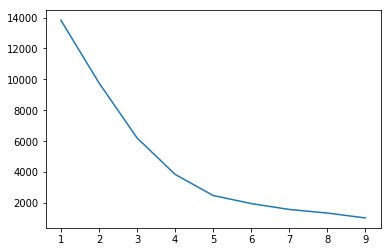

In [34]:
from sklearn.cluster import KMeans
copy_df=copy_df.fillna(0) 
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(copy_df.iloc[:,[-3, -2, -1]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)


Here we can see the Number of Clusters = 5

In [35]:
clf = KMeans(n_clusters = 4, random_state = 0)
y = clf.fit_predict(copy_df.iloc[:,[-3, -2, -1]])


<Figure size 1600x1200 with 0 Axes>

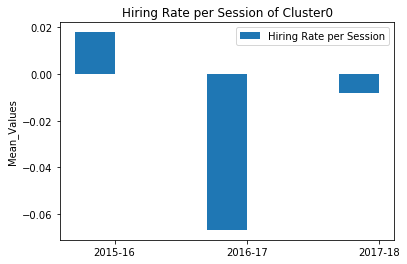

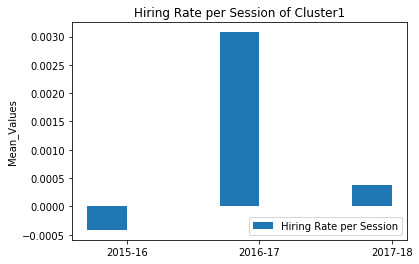

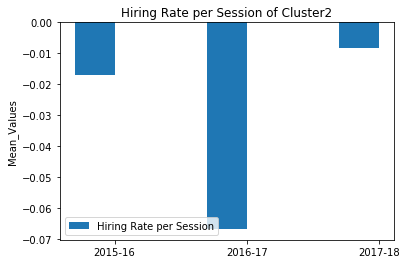

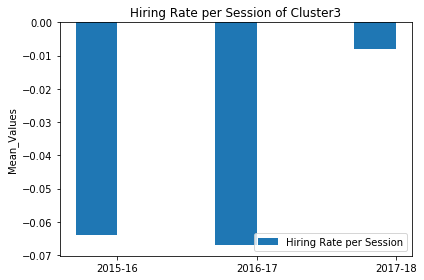

In [48]:
fig=plt.figure(figsize=(20, 15), dpi= 80, facecolor='w', edgecolor='k')   
color = ['b', 'r', 'y', 'g', 'm']
for i in range(4):
    
    years =['2015-16', '2016-17', '2017-18']
    ssn_means = copy_df[y_1==i].iloc[:,[-3, -2, -1]].mean()
    
    x = np.arange(len(years))  
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots()
    ax1 = ax.bar(x - width/2, ssn_means, width, label='Hiring Rate per Session')
    
   
    ax.set_ylabel('Mean_Values')
    ax.set_title('Hiring Rate per Session of Cluster{}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.legend()
    
    def autolabel(ax):
        for rect in ax:
            
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

fig.tight_layout()

plt.show()




The results we can conclude for the above bar garph are:

Cluster_0 has the companies with Employer_on_platform Count and Follower_count lesser than mean of the total of that year which gives an idea about the comapnies who has somewhat positive hiring rate for the session 2015-16, but in the session of 2016-17 this rate falls down drastically and become negative which clearly indiactes that the comapnies, instead of hiring, either they started firing ther employees which reduces employer_on_plateform or they just stopped/reduced the hiring process, whichh can be seen from the mean of the session 2016-17. This also indicates that the comapnies fall in this cluster didn't have expansion rate that high during that time and also overall. In session 2017-18, the improvement the market can be seen since there is some positive jump can be seen.

Cluster_1 has the companies with Employer_on_platform Count and Follower_count lesser than mean of the total of that year which gives an idea about the comapnies who has expanded the most among these comapnies in these sessions. As we can see from the graph of cluster_1, the jump in the session 2016-17 is teh maximum among all of themand is the only graoh having positive jump. But here too, in session 2017-18 the hiring rate slows down a lot, which clearly indicates the "not too good" condition og the market in the session 2017-18.

Cluster_2 companies have shown the similar behaviour as of the Cluster_0 but here we can see that the hiring has always negavite which makes them least interested comapnies for the job seekers. Since, instead of hiring, most of these comapnies are actually firing, which takes there mean this much negative. Stock investors need to check details about these comapnies before thier money at risk.

Cluster_3 has companies whose hirring rates are the worse among all even in the session 2016-17, where others have less drop in the graph, there huge drop tells about the condition of the companies and their expnsion rate. This much negatove mean shows that majority of the companies ar eeither going through some kind of problem or they are loosing their market. Or there could be another expalnation to this, may be there follower_count are way grater than there Employer_on_platform count. In this case, it makes a good watch list for the stock investors.  


Final verdict:

From the clustering results of both based on Session_counts of the companies, and based on Follower_count and Emp_count, the compnaies to target for both good job opportunities and safe stock investent are 
=> compnaies in the cluster_1 for Session_counts based and cliuster_0 for based on Follower_count and Emp_count.


##### top 10 companies fall in cluster_0

In [37]:
row = copy_df[y==0].ID.tolist() 
ssn_comp_0 = []
ssn_ind_0 = []
ssn_1516_c0 = []
ssn_1617_c0 = []
ssn_1718_c0 = []
ssn_mean_c0 = []

for i in row:
    ssn_comp_0.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ssn_ind_0.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    ssn_1516_c0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3]].values.mean())
    ssn_1617_c0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-2]].values.mean())
    ssn_1718_c0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-1]].values.mean())
    ssn_mean_c0.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3, -2, -1]].values.mean())
ssn_c0 = pd.concat([pd.DataFrame(ssn_comp_0), pd.DataFrame(ssn_ind_0), pd.DataFrame(ssn_1516_c0),pd.DataFrame(ssn_1617_c0), pd.DataFrame(ssn_1718_c0), pd.DataFrame(ssn_mean_c0)], axis = 1)
ssn_c0.columns = ['company', 'industry', 'session1516', 'session1617', 'session1718', 'session_mean']
ssn_c0.set_index('company')
ssn_c0.nsmallest(10, 'session_mean')   #popular


,company,industry,session1516,session1617,session1718,session_mean
4353,Whitehouse Station Family Med,Medical Practice,0.0,0.0,-1120.695652,-373.565217
3027,"Roper Southeast Asia LLC, subsidiary of Roper ...",Executive Office,0.0,0.0,-783.171988,-261.057329
3828,Asia Pacific Corporation Limited,Retail,0.0,0.0,-481.369565,-160.456522
3552,UDS Enterprise,Computer Software,0.0,0.0,-438.684783,-146.228261
4357,21 Club,Restaurants,0.0,0.0,-423.364233,-141.121411
3118,Cameron Compression Systems,Mechanical or Industrial Engineering,0.0,0.0,-227.375752,-75.791917
3056,Illuminate Labs,Computer Software,0.0,0.0,-166.518537,-55.506179
4207,"Enbridge Energy Partners, LP (EEP: NYSE)",NaN,0.0,0.0,-164.017403,-54.672468
2656,Newton Hospitality Inc,Staffing and Recruiting,0.0,0.0,-130.913043,-43.637681
3726,China XD Plastics,Chemicals,0.0,0.0,-114.496063,-38.165354


##### top 10 companies fall in cluster_1

In [38]:
row = copy_df[y==1].ID.tolist() 
ssn_comp_1 = []
ssn_ind_1= []
ssn_1516_c1 = []
ssn_1617_c1 = []
ssn_1718_c1 = []
ssn_mean_c1 = []

for i in row:
    ssn_comp_1.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ssn_ind_1.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    ssn_1516_c1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3]].values.mean())
    ssn_1617_c1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-2]].values.mean())
    ssn_1718_c1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-1]].values.mean())
    ssn_mean_c1.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3, -2, -1]].values.mean())
ssn_c1 = pd.concat([pd.DataFrame(ssn_comp_1), pd.DataFrame(ssn_ind_1), pd.DataFrame(ssn_1516_c1),pd.DataFrame(ssn_1617_c1), pd.DataFrame(ssn_1718_c1), pd.DataFrame(ssn_mean_c1)], axis = 1)
ssn_c1.columns = ['company', 'industry', 'session1516', 'session1617', 'session1718', 'session_mean']
ssn_c1.set_index('company')
ssn_c1.nlargest(10, 'session1617')   #popular


,company,industry,session1516,session1617,session1718,session_mean
0,"Investment Property Exchange Services, Inc (IP...",Financial Services,0.0,12963.801333,-3900.146631,3021.218234
1,Elliott Wilson Insurance,Insurance,0.0,10614.486111,0.000000,3538.162037
2,Optometrics Corporation,Nanotechnology,0.0,6537.657658,-12.023183,2175.211492


##### top 10 companies fall in cluster_2

In [39]:
row = copy_df[y==2].ID.tolist() 
ssn_comp_2 = []
ssn_ind_2= []
ssn_1516_c2 = []
ssn_1617_c2 = []
ssn_1718_c2 = []
ssn_mean_c2 = []

for i in row:
    ssn_comp_2.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ssn_ind_2.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    ssn_1516_c2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3]].values.mean())
    ssn_1617_c2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-2]].values.mean())
    ssn_1718_c2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-1]].values.mean())
    ssn_mean_c2.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3, -2, -1]].values.mean())
ssn_c2 = pd.concat([pd.DataFrame(ssn_comp_2), pd.DataFrame(ssn_ind_2), pd.DataFrame(ssn_1516_c2),pd.DataFrame(ssn_1617_c2), pd.DataFrame(ssn_1718_c2), pd.DataFrame(ssn_mean_c2)], axis = 1)
ssn_c2.columns = ['company', 'industry', 'session1516', 'session1617', 'session1718', 'session_mean']
ssn_c2.set_index('company')
ssn_c2.nlargest(10, 'session1516')   #popular


,company,industry,session1516,session1617,session1718,session_mean
2,Spirit Realty Capital,Financial Services,175.452053,6.541249,-13.988433,56.001623
1,Alleghany Corporation,Financial Services,164.165856,5.242108,-19.271895,50.045356
0,Vertex Energy Inc.,Environmental Services,101.417831,9.371900,-17.522889,31.088947


##### top 10 companies fall in cluster_3

In [40]:
row = copy_df[y==3].ID.tolist() 
ssn_comp_3 = []
ssn_ind_3= []
ssn_1516_c3 = []
ssn_1617_c3 = []
ssn_1718_c3 = []
ssn_mean_c3 = []

for i in row:
    ssn_comp_3.append(df_detail.loc[df.dataset_id == i].values[0][2])
    ssn_ind_3.append(df_detail.loc[df.dataset_id == i].values[0][-1])
    ssn_1516_c3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3]].values.mean())
    ssn_1617_c3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-2]].values.mean())
    ssn_1718_c3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-1]].values.mean())
    ssn_mean_c3.append(copy_dataset.loc[copy_dataset.ID == i].iloc[:, [-3, -2, -1]].values.mean())
ssn_c3 = pd.concat([pd.DataFrame(ssn_comp_3), pd.DataFrame(ssn_ind_3), pd.DataFrame(ssn_1516_c3),pd.DataFrame(ssn_1617_c3), pd.DataFrame(ssn_1718_c3), pd.DataFrame(ssn_mean_c3)], axis = 1)
ssn_c3.columns = ['company', 'industry', 'session1516', 'session1617', 'session1718', 'session_mean']
ssn_c3.set_index('company')
ssn_c3.nlargest(10, 'session1617')   #popular


,company,industry,session1516,session1617,session1718,session_mean
0,Computerized Waste Systems,Accounting,0.0,0.0,1465.782609,488.594203
1,American Natural Resources Company (Tx),Law Practice,0.0,0.0,2457.989130,819.329710
2,Cme Enterprises Ltd,Entertainment,0.0,0.0,3906.731884,1302.243961
3,River Bay Club,Consumer Services,0.0,0.0,1925.934783,641.978261
